## Geneformer Fine-Tuning for Classification of Dosage-Sensitive vs. -Insensitive Transcription Factors (TFs)

Please note that, as usual with deep learning models, we **highly** recommend tuning learning hyperparameters for all fine-tuning applications as this can significantly improve model performance. Example below uses default hyperparameters, but please see the "hyperparam_optimiz_for_disease_classifier" script for an example of how to tune hyperparameters for downstream applications.

### Train gene classifier with 5-fold cross-validation:

### initialize repo and install dependencies

In [ ]:
!pip install gdown

In [ ]:
!gdown 1JAjg5w_a9GlTRF29fASbpTzr3u1uSDke

Downloading...
From: https://drive.google.com/uc?id=1JAjg5w_a9GlTRF29fASbpTzr3u1uSDke
To: /content/example_input_files_gene_classification_bivalent_promoters_bivalent_vs_no_methyl.pickle
100% 2.53k/2.53k [00:00<00:00, 13.4MB/s]


In [ ]:
!gdown 1nfngDCBfwWaeT3gjHj0d8kcrqIVmw3sF

Downloading...
From: https://drive.google.com/uc?id=1nfngDCBfwWaeT3gjHj0d8kcrqIVmw3sF
To: /content/dataset_info.json
100% 646/646 [00:00<00:00, 2.81MB/s]


In [ ]:
!gdown 17j3vNUBzc-5y9e6wNTw24MkHxn0OQQ5Y

Downloading...
From: https://drive.google.com/uc?id=17j3vNUBzc-5y9e6wNTw24MkHxn0OQQ5Y
To: /content/dataset.arrow
100% 56.4M/56.4M [00:00<00:00, 113MB/s]


In [ ]:
!gdown 1XrmEtEyF5x1O5uM3KizKJqBAwOuCpXKB

Downloading...
From: https://drive.google.com/uc?id=1XrmEtEyF5x1O5uM3KizKJqBAwOuCpXKB
To: /content/state.json
100% 383/383 [00:00<00:00, 2.32MB/s]


In [ ]:
!mkdir dataset
!mv /content/dataset_info.json dataset
!mv /content/state.json dataset
!mv /content/dataset.arrow dataset

In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!ls

dataset
example_input_files_gene_classification_dosage_sensitive_tfs_dosage_sensitivity_TFs.pickle
sample_data


In [ ]:
!git clone https://huggingface.co/ctheodoris/Geneformer

Cloning into 'Geneformer'...
remote: Enumerating objects: 1013, done.
remote: Counting objects: 100% (364/364), done.
remote: Compressing objects: 100% (331/331), done.
remote: Total 1013 (delta 224), reused 32 (delta 32), pack-reused 649 (from 1)
Receiving objects: 100% (1013/1013), 5.70 MiB | 12.37 MiB/s, done.
Resolving deltas: 100% (600/600), done.
Filtering content: 100% (27/27), 1.47 GiB | 63.58 MiB/s, done.


In [ ]:
!pip install Geneformer/

Processing ./Geneformer
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 102.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### imports and global variables

In [ ]:
import datetime
import pickle
from geneformer import Classifier
import os
from datasets import Dataset
import geneformer

In [ ]:
geneformer.TOKEN_DICTIONARY_FILE

PosixPath('/home/shekhar.nath/.local/lib/python3.10/site-packages/geneformer/token_dictionary_gc95M.pkl')

In [ ]:
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
with open("./data/geneformer/token_dictionary_gc95M.pkl", "rb") as f:
    dict = pickle.load(f)

### training

In [ ]:
!mkdir results

In [ ]:
current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"

output_prefix = "bivalent_no_methylation"
# output_dir = f"/path/to/output_dir/{datestamp}"
output_dir = f"results/{datestamp}"
!mkdir $output_dir

In [ ]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/blob/main/example_input_files/gene_classification/dosage_sensitive_tfs/dosage_sensitivity_TFs.pickle
# with open("/path/to/dosage_sensitivity_TFs.pickle", "rb") as fp:
with open("/content/example_input_files_gene_classification_bivalent_promoters_bivalent_vs_no_methyl.pickle", "rb") as fp:
    gene_class_dict = pickle.load(fp)

In [ ]:
batch_size = 12
epochs = 1
training_args = {
    "num_train_epochs": epochs,
    "learning_rate": 5e-5,
    "lr_scheduler_type": "linear",
    "warmup_steps": 500,
    "per_device_train_batch_size": batch_size,
    "per_device_eval_batch_size": batch_size,
    "weight_decay": 0.001,
}

In [ ]:
cc = Classifier(classifier="gene",
                gene_class_dict = gene_class_dict,
                max_ncells = 15_000,
                freeze_layers = 0,
                num_crossval_splits = 5,
                forward_batch_size=12,
                training_args =  training_args,
                token_dictionary_file = "/content/Geneformer/geneformer/gene_dictionaries_30m/token_dictionary_gc30M.pkl",
                nproc=16,
               ngpu = 1)

In [ ]:
# Example input_data_file: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/gene_classification/dosage_sensitive_tfs/gc-30M_sample50k.dataset
cc.prepare_data(input_data_file="dataset",
                output_directory=output_dir,
                output_prefix=output_prefix)

In [ ]:
# 6 layer Geneformer: https://huggingface.co/ctheodoris/Geneformer/blob/main/model.safetensors
all_metrics = cc.validate(model_directory="/content/Geneformer/gf-6L-30M-i2048",
                          prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                          id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                          output_directory=output_dir,
                          output_prefix=output_prefix,
                        )

0it [00:00, ?it/s]

****** Validation split: 1/5 ******



Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
112,0.611400
224,0.169800
336,0.104300
448,0.060300
560,0.025700
672,0.029800
784,0.030800
896,0.014100
1008,0.014500
1120,0.023400


  0%|          | 0/515 [00:00<?, ?it/s]

****** Validation split: 2/5 ******



Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/15000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/446 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/15000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/446 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/1354 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1354 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
125,0.563100
250,0.181600
375,0.081100
500,0.053900
625,0.030800
750,0.022900
875,0.020700
1000,0.025800
1125,0.025800
1250,0.018300


  0%|          | 0/38 [00:00<?, ?it/s]

****** Validation split: 3/5 ******



Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/11576 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/7781 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/11576 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/7781 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/3698 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3698 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
96,0.669100
192,0.290200
288,0.164600
384,0.093300
480,0.069800
576,0.051100
672,0.037000
768,0.034400
864,0.024300
960,0.037700


  0%|          | 0/649 [00:00<?, ?it/s]

****** Validation split: 4/5 ******



Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/15000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/1209 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/15000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1209 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/690 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/690 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
125,0.566100
250,0.165100
375,0.098700
500,0.045200
625,0.014000
750,0.026000
875,0.020900
1000,0.018500
1125,0.015400
1250,0.003700


  0%|          | 0/101 [00:00<?, ?it/s]

****** Validation split: 5/5 ******



Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/15000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/2397 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/15000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2397 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/16836 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/968 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/968 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
125,0.543200
250,0.130300
375,0.064000
500,0.040100
625,0.037400
750,0.023400
875,0.019700
1000,0.015800
1125,0.016500
1250,0.014500


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# 6 layer Geneformer: https://huggingface.co/ctheodoris/Geneformer/blob/main/model.safetensors
all_metrics = cc.validate(model_directory="/content/Geneformer/gf-6L-30M-i2048",
                          prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled.dataset",
                          id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                          output_directory=output_dir,
                          output_prefix=output_prefix,
                        )

0it [00:00, ?it/s]

****** Validation split: 1/5 ******



Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
83,0.699500
166,0.640300
249,0.540400
332,0.408700
415,0.295200
498,0.207900
581,0.135300
664,0.109600
747,0.087200
830,0.085800


  0%|          | 0/10000 [00:00<?, ?it/s]

****** Validation split: 2/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
83,0.747900
166,0.682700
249,0.580400
332,0.430100
415,0.318000
498,0.216400
581,0.145000
664,0.109100
747,0.090700
830,0.079500


  0%|          | 0/10000 [00:00<?, ?it/s]

****** Validation split: 3/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
83,0.751900
166,0.692800
249,0.593900
332,0.461200
415,0.327200
498,0.230800
581,0.165200
664,0.120000
747,0.107900
830,0.094800


  0%|          | 0/10000 [00:00<?, ?it/s]

****** Validation split: 4/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
83,0.744500
166,0.677500
249,0.554100
332,0.413500
415,0.304000
498,0.207900
581,0.142000
664,0.105700
747,0.080900
830,0.085700


  0%|          | 0/10000 [00:00<?, ?it/s]

****** Validation split: 5/5 ******



Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter (num_proc=16):   0%|          | 0/33558 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at /content/Geneformer/gf-6L-30M-i2048 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.10/dist-packages/geneformer/collator_for_classification.py:644: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

Step,Training Loss
83,0.740700
166,0.680200
249,0.564500
332,0.421800
415,0.293100
498,0.206600
581,0.145000
664,0.103700
747,0.085400
830,0.083600


  0%|          | 0/10000 [00:00<?, ?it/s]

<Figure size 1000x1000 with 0 Axes>

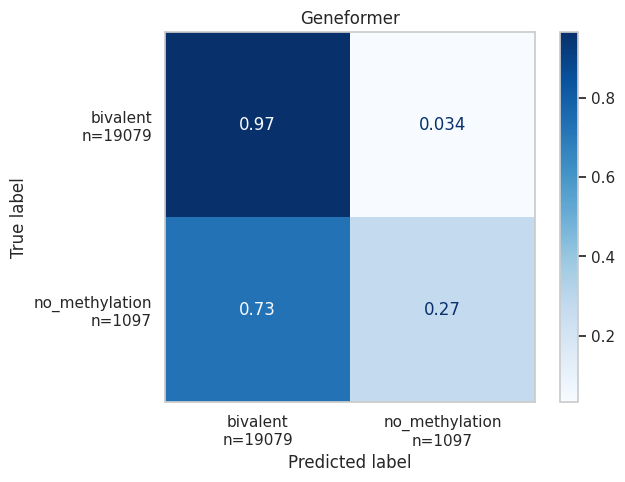

In [ ]:
cc.plot_conf_mat(
    conf_mat_dict={"Geneformer": all_metrics["conf_matrix"]},
    output_directory=output_dir,
    output_prefix=output_prefix,
)

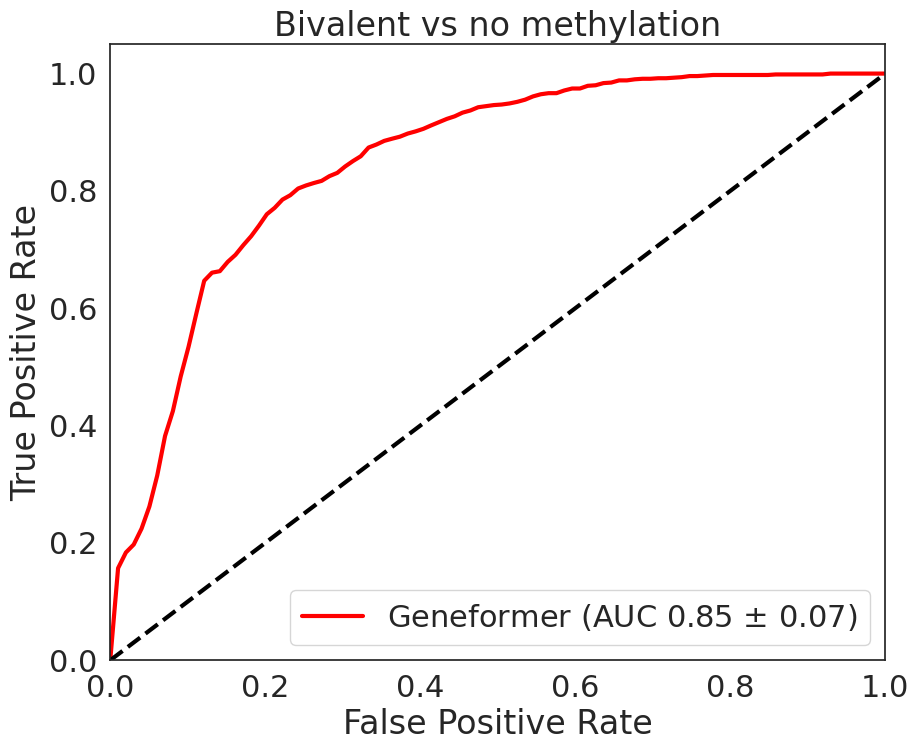

In [ ]:
cc.plot_roc(
    roc_metric_dict={"Geneformer": all_metrics["all_roc_metrics"]},
    model_style_dict={"Geneformer": {"color": "red", "linestyle": "-"}},
    title="Bivalent vs no methylation",
    output_directory=output_dir,
    output_prefix=output_prefix,
)